In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


---------------------------------------------------------

Choosing Annual Income and Spending Score as main columns

In [7]:
X = df.iloc[:, [3,4]].values
# X

In [ ]:
# Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [8]:
# Finding WCSS value for different number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

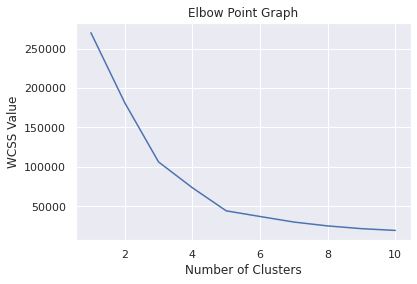

In [9]:
# Plotting the elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Value")
plt.show()

Optimum number of clusters = 5

In [12]:
# Training the model

kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)

# Return a label for each data point based on their cluster
y = kmeans.fit_predict(X)
# len(y)

200

Visualizing all the clusters

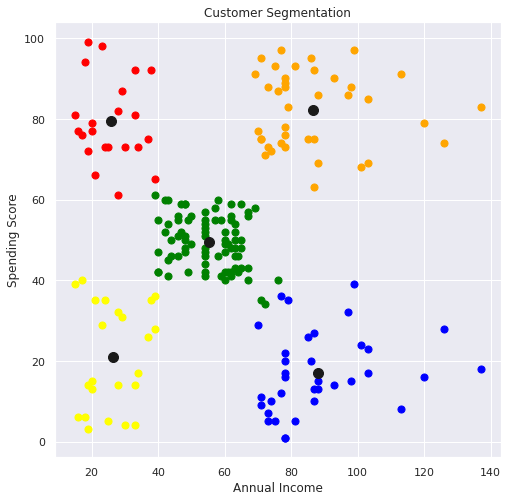

In [17]:
# Plotting all the clusters and their centorids

color = ["green", "red", "orange", "yellow", "blue"]

plt.figure(figsize=(8,8))
for i in range(5):
    plt.scatter(X[y==i, 0], X[y==i, 1], s=50, c=color[i], label=f"Cluster {i}")

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="k", label="Centroid")

plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.show()